# Importando Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('DelayedFlights.zip')
df 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Mostrar todas as colunas

In [5]:
pd.set_option('display.max_columns', 30)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


O que representa cada coluna:

**Year:** O ano da data do voo.

**Month:** O mês da data do voo.

**DayofMonth:** O dia do mês da data do voo.

**DayOfWeek:** O dia da semana da data do voo (1 para segunda-feira, 2 para terça-feira, e assim por diante).

**DepTime:** A hora de partida real do voo (formato HHMM).

**CRSDepTime:** A hora de partida programada do voo (formato HHMM).

**ArrTime:** A hora de chegada real do voo (formato HHMM).

**CRSArrTime:** A hora de chegada programada do voo (formato HHMM).

**UniqueCarrier:** O código do transportador aéreo.

**FlightNum:** O número do voo.

**TailNum:** O número de cauda da aeronave.

**ActualElapsedTime:** O tempo real de voo em minutos.

**CRSElapsedTime:** O tempo de voo programado em minutos.

**AirTime:** O tempo real no ar em minutos.

**ArrDelay:** O atraso na chegada em minutos.

**DepDelay:** O atraso na partida em minutos.

**Origin:** O aeroporto de origem do voo.

**Dest:** O aeroporto de destino do voo.

**Distance:** A distância percorrida em milhas.

**TaxiIn:** O tempo de táxi na chegada em minutos.

**TaxiOut:** O tempo de táxi na partida em minutos.

**Cancelled:** Indica se o voo foi cancelado (1 para sim, 0 para não).

**CancellationCode:** O código de cancelamento, se o voo foi cancelado. Sendo A = transportadora, B = clima, C = NAS(National Airspace System), D = segurança

**Diverted:** Indica se o voo foi desviado (1 para sim, 0 para não).

**CarrierDelay:** O tempo de atraso atribuído à companhia aérea em minutos.

**WeatherDelay:** O tempo de atraso atribuído ao clima em minutos.

**NASDelay:** O tempo de atraso atribuído ao Sistema Nacional de Aviação em minutos.

**SecurityDelay:** O tempo de atraso atribuído à segurança em minutos.

**LateAircraftDelay:** O tempo de atraso atribuído à aeronave em minutos.


In [6]:
df['Year'].unique()

array([2008], dtype=int64)

In [7]:
# Excluindo as duas primeiras colunas
df = df.drop(df.columns[:2], axis=1)

In [8]:
df.shape

(1936758, 28)

In [9]:
df.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1438
CRSDepTime           1207
ArrTime              1440
CRSArrTime           1364
UniqueCarrier          20
FlightNum            7499
TailNum              5366
ActualElapsedTime     673
CRSElapsedTime        515
AirTime               650
ArrDelay             1128
DepDelay             1058
Origin                303
Dest                  304
Distance             1419
TaxiIn                180
TaxiOut               332
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          983
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

Verificar a quantidade de linhas com valores nulos

In [10]:
df.isnull().sum().sort_values(ascending=False)

LateAircraftDelay    689270
SecurityDelay        689270
NASDelay             689270
WeatherDelay         689270
CarrierDelay         689270
ActualElapsedTime      8387
ArrDelay               8387
AirTime                8387
TaxiIn                 7110
ArrTime                7110
TaxiOut                 455
CRSElapsedTime          198
TailNum                   5
Distance                  0
Diverted                  0
Cancelled                 0
CancellationCode          0
Month                     0
Dest                      0
Origin                    0
DayofMonth                0
FlightNum                 0
UniqueCarrier             0
CRSArrTime                0
CRSDepTime                0
DepTime                   0
DayOfWeek                 0
DepDelay                  0
dtype: int64

Devido a presença de várias linhas nulas as colunas LateAircraftDelay, SecurityDelay,NASDelay, WeatherDelay, CarrierDelay, ActualElapsedTime, AirTime, ArrDelay, ArrTime, TaxiIn, TaxiOut, CRSElapsedTime devem ser tratadas.

In [11]:
df['LateAircraftDelay'].fillna(0, inplace=True)
df['SecurityDelay'].fillna(0, inplace=True)
df['NASDelay'].fillna(0, inplace=True)
df['WeatherDelay'].fillna(0, inplace=True)
df['CarrierDelay'].fillna(0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   FlightNum          int64  
 9   TailNum            object 
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  TaxiIn             float64
 19  TaxiOut            float64
 20  Cancelled          int64  
 21  CancellationCode   object 
 22  Diverted           int64  
 23  CarrierDelay       float64
 24  WeatherDelay       float64
 25  NASDelay          

In [32]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.corr()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000000,0.059651,0.000088,-0.007809,-0.011367,0.001014,0.001367,-0.000188,0.002684,0.007046,0.000860,-0.000897,0.004769,0.005498,0.019705,0.002574,0.028837,0.006467,-0.004159,0.003512,0.004422,-0.002948,-0.002194
DayofMonth,0.059651,1.000000,0.017476,0.001014,0.001019,0.000833,0.000758,-0.005912,-0.000880,-0.000028,-0.000244,0.004129,0.005289,0.000117,-0.002926,-0.002201,0.004671,0.001190,-0.001829,0.000293,0.003287,-0.000362,0.005435
DayOfWeek,0.000088,0.017476,1.000000,0.021924,0.027039,0.010913,0.017750,-0.009769,0.003072,0.004954,0.004738,0.006123,0.008538,0.008138,0.008516,-0.010302,0.000023,-0.001361,0.007105,0.004181,-0.005954,0.003653,0.005588
DepTime,-0.007809,0.001014,0.021924,1.000000,0.881598,0.458934,0.711513,-0.024786,-0.047040,-0.044619,-0.054831,0.127017,0.139254,-0.056003,-0.012023,0.030481,0.002280,-0.004632,-0.010085,0.016579,0.048442,-0.009159,0.169744
CRSDepTime,-0.011367,0.001019,0.027039,0.881598,1.000000,0.396724,0.710303,-0.054808,-0.034925,-0.026388,-0.036582,0.044447,0.058875,-0.029517,-0.032379,0.011408,0.000023,-0.009096,-0.066133,-0.000760,-0.008550,-0.011851,0.147540
ArrTime,0.001014,0.000833,0.010913,0.458934,0.396724,1.000000,0.619385,-0.013665,-0.013595,-0.012911,-0.017684,-0.050948,-0.053024,-0.027751,0.039818,0.001430,NaN,-0.007204,-0.065453,-0.023780,0.030989,-0.005919,-0.025115
CRSArrTime,0.001367,0.000758,0.017750,0.711513,0.710303,0.619385,1.000000,-0.060006,0.033203,0.040117,0.025907,0.043078,0.053706,0.024335,0.013819,0.037942,0.000201,0.000907,-0.060757,0.001406,0.020631,-0.009240,0.116522
FlightNum,-0.000188,-0.005912,-0.009769,-0.024786,-0.054808,-0.013665,-0.060006,1.000000,-0.322283,-0.335956,-0.341250,0.061266,0.051852,-0.356770,-0.003918,0.015524,0.009147,-0.002885,0.060640,0.061871,0.028619,-0.000619,-0.019340
ActualElapsedTime,0.002684,-0.000880,0.003072,-0.047040,-0.034925,-0.013595,0.033203,-0.322283,1.000000,0.971122,0.976660,0.068130,0.018492,0.952980,0.166348,0.289568,NaN,NaN,0.017631,0.007229,0.148138,0.005644,-0.012891
CRSElapsedTime,0.007046,-0.000028,0.004954,-0.044619,-0.026388,-0.012911,0.040117,-0.335956,0.971122,1.000000,0.986086,-0.015676,0.007001,0.981759,0.099646,0.123839,-0.003916,0.024660,0.007948,-0.017718,0.023255,0.003501,-0.024700


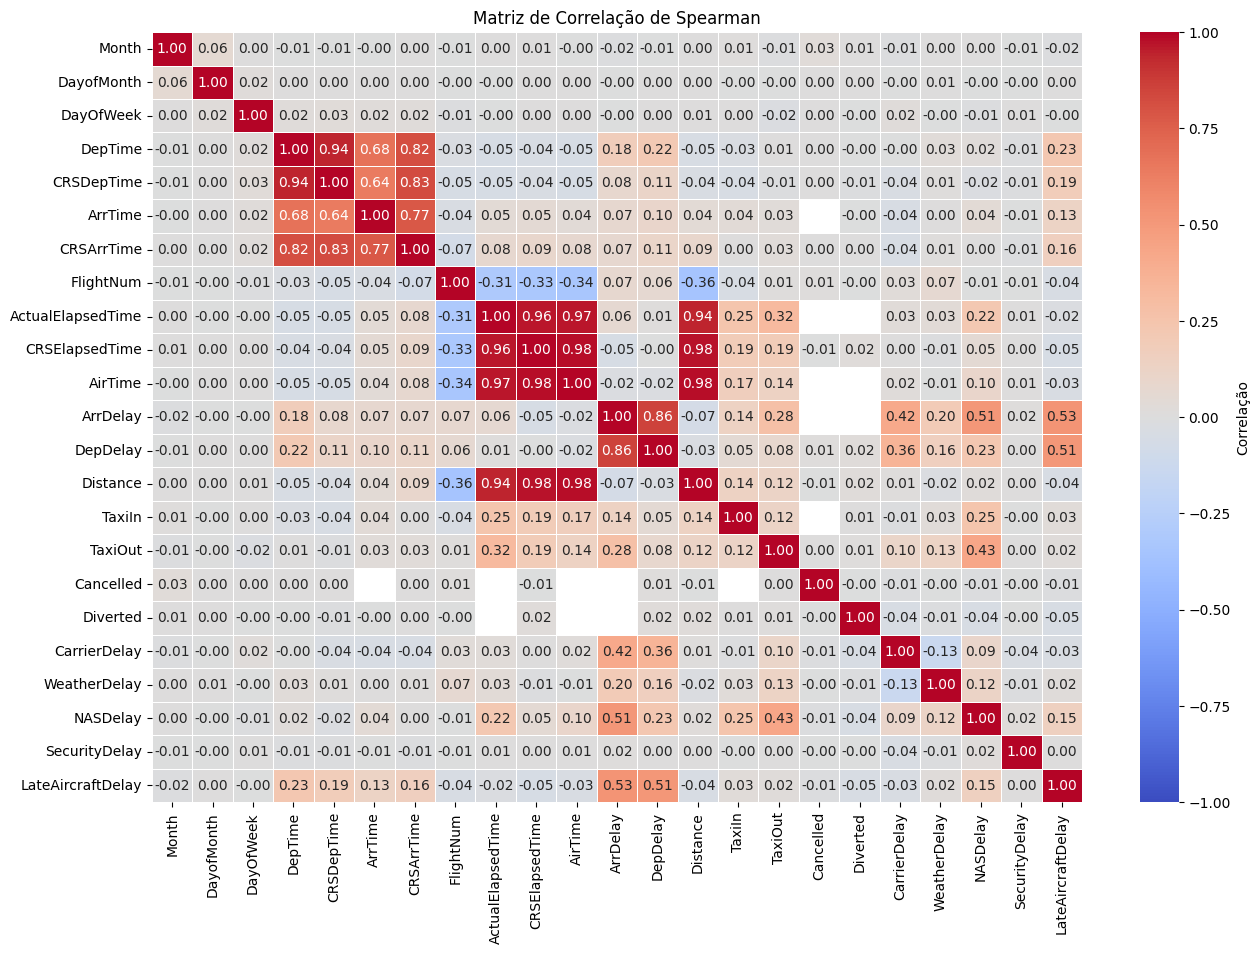

In [33]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="spearman")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Spearman")

# Exibindo o gráfico
plt.show()

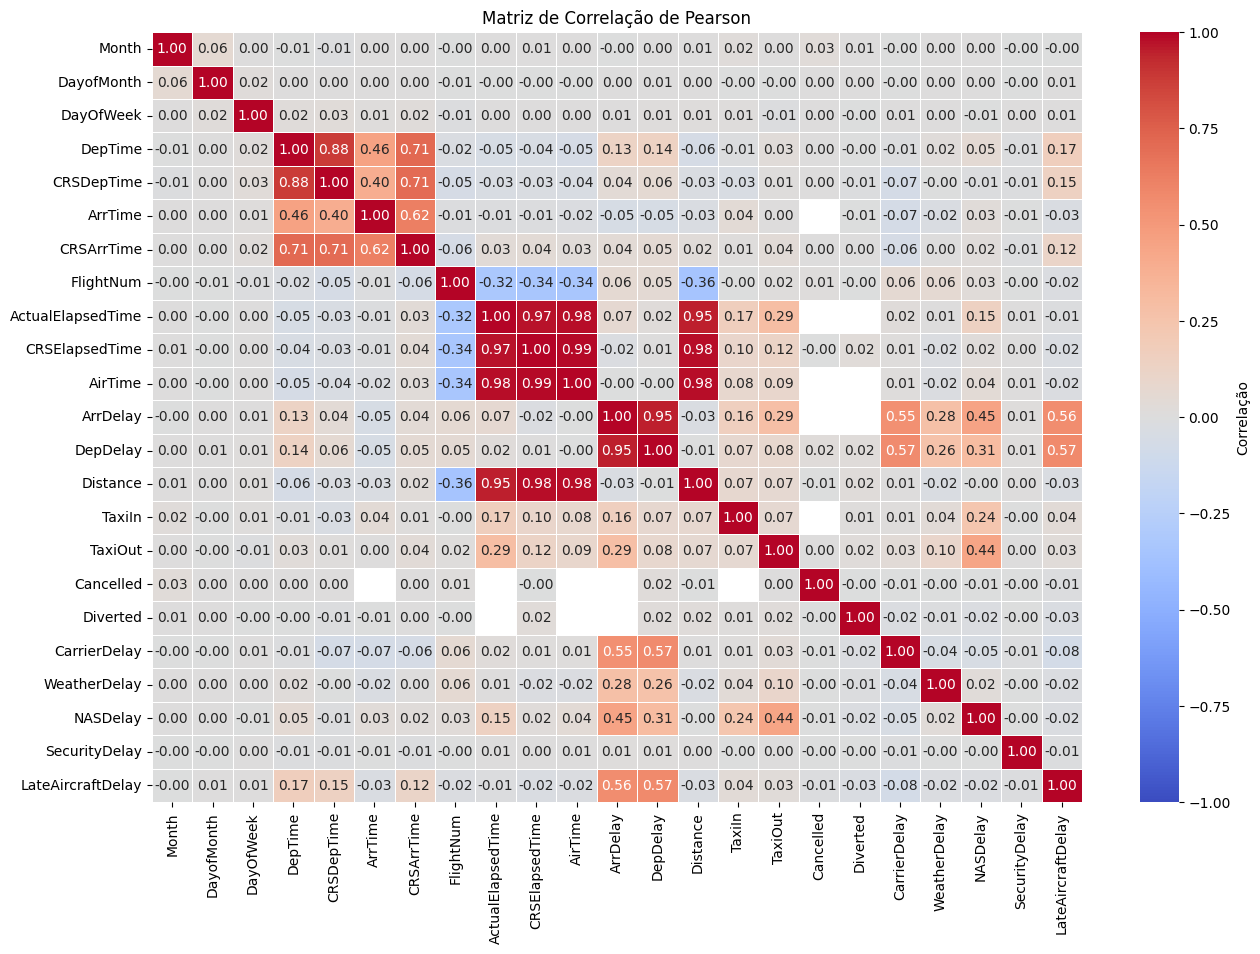

In [44]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="pearson")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Pearson")

# Exibindo o gráfico
plt.show()

         AREA   PERIMETER  ST99_D00_  ST99_D00_I STATE    NAME LSAD REGION  \
0  271.254384  227.171422          2           1    02  Alaska   01      4   
1    0.003749    0.349840          3           2    02  Alaska   01      4   
2    0.001499    0.153533          4           3    02  Alaska   01      4   
3    0.031300    0.712226          5           4    02  Alaska   01      4   
4    0.889339    7.360320          6           5    02  Alaska   01      4   

  DIVISION LSAD_TRANS                                           geometry  
0        9       None  POLYGON ((-147.78711 70.24536, -147.76510 70.2...  
1        9       None  POLYGON ((-166.05315 66.26494, -166.03187 66.2...  
2        9       None  POLYGON ((-168.89322 65.74470, -168.89875 65.7...  
3        9       None  POLYGON ((-168.21012 64.99896, -168.20791 65.0...  
4        9       None  POLYGON ((-171.73986 63.71712, -171.73321 63.7...  


<Axes: >

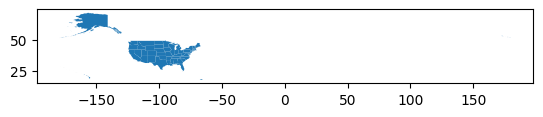

In [74]:
# Leitura do arquivo .shp
shapefile_path = 'Mapa/st99_d00.shp' # mapa do EUA
gdf = gpd.read_file(shapefile_path)

# Exibindo informações sobre o GeoDataFrame
print(gdf.head())

# Visualizando o GeoDataFrame
gdf.plot()

In [75]:
# Exibe as informações sobre as colunas
print("Colunas presentes no shapefile:")
print(gdf.columns)

Colunas presentes no shapefile:
Index(['AREA', 'PERIMETER', 'ST99_D00_', 'ST99_D00_I', 'STATE', 'NAME', 'LSAD',
       'REGION', 'DIVISION', 'LSAD_TRANS', 'geometry'],
      dtype='object')


In [76]:
gdf.shape

(273, 11)

<Axes: >

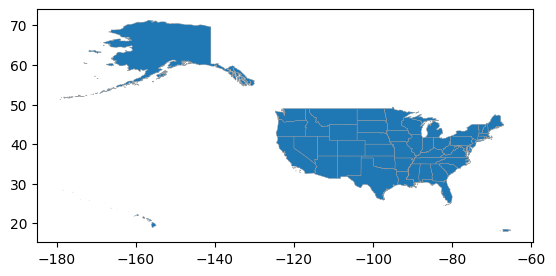

In [102]:
gdf = gpd.read_file(shapefile_path)

# Filtrar geometrias
gdf_mod = gdf.cx[:-10, 0:]

# Visualizar o resultado
gdf_mod.plot( edgecolor='0.6', linewidth=0.3, legend=True)

In [ ]:
# acho que esse shapefile só terá utilidade se:
#- tivermos as coordenadas dos aeroportos
#- uma tabela com a sigla do aeroporto e o estado onde está

[Text(0, 0, 'Transportadora'), Text(0, 1, 'Clima'), Text(0, 2, 'NCS')]

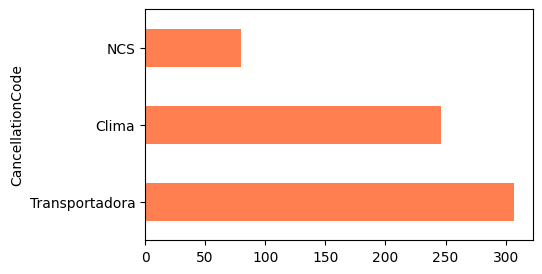

In [55]:
# gráfico para analisar qual o maior motivo para cancelamento de voo
voos_cancelados = df[df['Cancelled']==1]
legend_labels = {'A': 'Transportadora', 'B': 'Clima', 'C': 'NCS'}

plt.figure(figsize=(5, 3))
ax = voos_cancelados['CancellationCode'].value_counts().plot(kind='barh', color='coral')
ax.set_yticklabels([legend_labels[label] for label in voos_cancelados['CancellationCode'].unique()])


<Axes: xlabel='UniqueCarrier'>

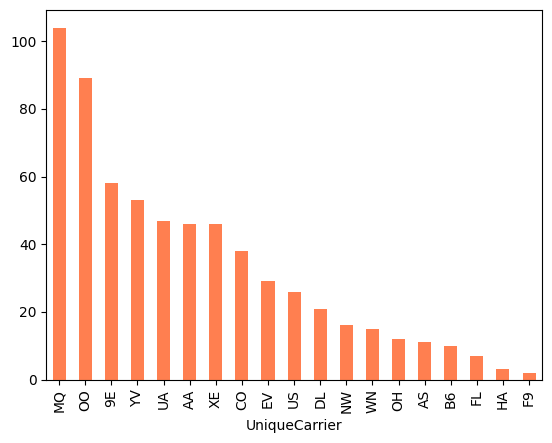

In [58]:
#Qual transportadora cancelou mais voos
voos_cancelados['UniqueCarrier'].value_counts().plot(kind='bar', color='coral')

In [ ]:
# Algumas sugestões:
#Analisar atrasos por semana ou mes
# Para onde são a maioria dos voos
# Tempo de voo 
#Pontualidade dos voos